In [36]:
import os, json
folder = "/Users/sandyliu/tiktok-news-exposure/1-compile-raw-data/rb_data_chunks"

files = os.listdir(folder) # read content of folder
files = [file for file in files if file.endswith('json')] # ensure that we will read only JSON files
files


['user_data_rb_chunk_12.json',
 'user_data_rb_chunk_13.json',
 'user_data_rb_chunk_1.json',
 'user_data_rb_chunk_14.json',
 'user_data_rb_chunk_6.json',
 'user_data_rb_chunk_7.json',
 'user_data_rb_chunk_15.json',
 'user_data_rb_chunk_8.json',
 'user_data_rb_chunk_16.json',
 'user_data_rb_chunk_4.json',
 'user_data_rb_chunk_5.json',
 'user_data_rb_chunk_3_left.json',
 'user_data_rb_chunk_17.json',
 'user_data_rb_chunk_9.json',
 'user_data_rb_chunk_2.json',
 'user_data_rb_chunk_10.json',
 'user_data_rb_chunk_11.json',
 'user_data_rb_chunk_3.json']

In [28]:
files.sort(reverse=True)

In [29]:
files

['user_data_rb_chunk_9.json',
 'user_data_rb_chunk_8.json',
 'user_data_rb_chunk_7.json',
 'user_data_rb_chunk_6.json',
 'user_data_rb_chunk_5.json',
 'user_data_rb_chunk_4.json',
 'user_data_rb_chunk_3.json',
 'user_data_rb_chunk_2.json',
 'user_data_rb_chunk_17.json',
 'user_data_rb_chunk_16.json',
 'user_data_rb_chunk_15.json',
 'user_data_rb_chunk_14.json',
 'user_data_rb_chunk_13.json',
 'user_data_rb_chunk_12.json',
 'user_data_rb_chunk_11.json',
 'user_data_rb_chunk_10.json',
 'user_data_rb_chunk_1.json']

In [30]:
files = [file for file in files if len(file) < 26]

In [32]:
files.sort(reverse=False)

In [33]:
files

['user_data_rb_chunk_1.json',
 'user_data_rb_chunk_2.json',
 'user_data_rb_chunk_3.json',
 'user_data_rb_chunk_4.json',
 'user_data_rb_chunk_5.json',
 'user_data_rb_chunk_6.json',
 'user_data_rb_chunk_7.json',
 'user_data_rb_chunk_8.json',
 'user_data_rb_chunk_9.json']

In [34]:
final_files = files[:6]

In [35]:
final_files

['user_data_rb_chunk_1.json',
 'user_data_rb_chunk_2.json',
 'user_data_rb_chunk_3.json',
 'user_data_rb_chunk_4.json',
 'user_data_rb_chunk_5.json',
 'user_data_rb_chunk_6.json']

In [45]:
rawRevisionsDct = {}

for filename in final_files:
    name = filename[13:20]
    file_path = os.path.join(folder, filename)
    print(name)
    rawRevisionsDct[name] = json.load(open(file_path))

chunk_1
chunk_2
chunk_3
chunk_4
chunk_5
chunk_6


In [46]:
names = list(rawRevisionsDct.keys())
names

['chunk_1', 'chunk_2', 'chunk_3', 'chunk_4', 'chunk_5', 'chunk_6']

In [47]:
rawRevisionsDct

{'chunk_1': [{'Date': '2024-03-01 14:58:33',
   'Link': 'https://www.tiktokv.com/share/video/7333422897228156202/'},
  {'Date': '2024-02-27 15:48:32',
   'Link': 'https://www.tiktokv.com/share/video/7318137265140567338/'},
  {'Date': '2024-02-14 16:02:19',
   'Link': 'https://www.tiktokv.com/share/video/7309076358305516833/'},
  {'Date': '2024-02-14 16:01:51',
   'Link': 'https://www.tiktokv.com/share/video/7310316392887225642/'},
  {'Date': '2024-02-14 16:01:28',
   'Link': 'https://www.tiktokv.com/share/video/7330783017079786757/'},
  {'Date': '2024-02-14 16:01:08',
   'Link': 'https://www.tiktokv.com/share/video/7313575389580954926/'},
  {'Date': '2024-02-14 16:00:55',
   'Link': 'https://www.tiktokv.com/share/video/7308389258002238750/'},
  {'Date': '2024-02-14 15:59:47',
   'Link': 'https://www.tiktokv.com/share/video/7321560782800473386/'},
  {'Date': '2024-02-14 15:54:04',
   'Link': 'https://www.tiktokv.com/share/video/7308389258002238750/'},
  {'Date': '2024-01-31 03:16:52',
 

In [48]:
rawRevisionsDct[names[0]][0]

{'Date': '2024-03-01 14:58:33',
 'Link': 'https://www.tiktokv.com/share/video/7333422897228156202/'}

In [71]:
from time import mktime
from datetime import datetime

def convert_timestamp(ts):
    """Convert the timestamp into a datetime object.
    """
    timestamp = (int(ts[0:4]), int(ts[5:7]), int(ts[8:10]), int(ts[11:13]), int(ts[14:16]), int(ts[17:19]), 0, 0, -1)
    #print("timestamp tuple:", timestamp)
    return datetime.fromtimestamp(mktime(timestamp))

In [72]:
ts = rawRevisionsDct[names[0]][0]['Date']
convert_timestamp(ts)

datetime.datetime(2024, 3, 1, 14, 58, 33)

In [73]:
# new dictionary to only store the timestamps
timeSeriesDct = {}

for name in rawRevisionsDct:
    revLst = rawRevisionsDct[name]
    timeSeriesDct[name] = [convert_timestamp(rev['Date']) for rev in revLst]
    
    
# let's test it
for name in timeSeriesDct:
    print(name, len(timeSeriesDct[name]))

chunk_1 10000
chunk_2 10000
chunk_3 10000
chunk_4 10000
chunk_5 10000
chunk_6 10000


In [92]:
import pandas as pd

chunk_1 = timeSeriesDct['chunk_1']

triplets = [(chunk_1[i], 1, 'Chunk_1') for i in range(len(chunk_1))]
df = pd.DataFrame(triplets, columns=['Timestamp', 'Count', 'Chunk'])
df.head()

,Timestamp,Count,Chunk
0,2024-03-01 14:58:33,1,Chunk_1
1,2024-02-27 15:48:32,1,Chunk_1
2,2024-02-14 16:02:19,1,Chunk_1
3,2024-02-14 16:01:51,1,Chunk_1
4,2024-02-14 16:01:28,1,Chunk_1


In [93]:
df.set_index('Timestamp', inplace=True)
df.head()

,Count,Chunk
Timestamp,,
2024-03-01 14:58:33,1,Chunk_1
2024-02-27 15:48:32,1,Chunk_1
2024-02-14 16:02:19,1,Chunk_1
2024-02-14 16:01:51,1,Chunk_1
2024-02-14 16:01:28,1,Chunk_1


In [94]:
df.resample('h')['Count'].sum()

Timestamp
2024-01-30 18:00:00      7
2024-01-30 19:00:00      1
2024-01-30 20:00:00      0
2024-01-30 21:00:00      0
2024-01-30 22:00:00      0
                      ... 
2024-03-04 17:00:00      0
2024-03-04 18:00:00      0
2024-03-04 19:00:00      0
2024-03-04 20:00:00     33
2024-03-04 21:00:00    275
Freq: h, Name: Count, Length: 820, dtype: int64

In [95]:
df.resample('h')['Count'].sum()[:12]

Timestamp
2024-01-30 18:00:00    7
2024-01-30 19:00:00    1
2024-01-30 20:00:00    0
2024-01-30 21:00:00    0
2024-01-30 22:00:00    0
2024-01-30 23:00:00    0
2024-01-31 00:00:00    0
2024-01-31 01:00:00    1
2024-01-31 02:00:00    0
2024-01-31 03:00:00    1
2024-01-31 04:00:00    0
2024-01-31 05:00:00    0
Freq: h, Name: Count, dtype: int64

In [96]:
df.groupby('Chunk').resample('h')['Count'].sum().reset_index()

,Chunk,Timestamp,Count
0,Chunk_1,2024-01-30 18:00:00,7
1,Chunk_1,2024-01-30 19:00:00,1
2,Chunk_1,2024-01-30 20:00:00,0
3,Chunk_1,2024-01-30 21:00:00,0
4,Chunk_1,2024-01-30 22:00:00,0
...,...,...,...
815,Chunk_1,2024-03-04 17:00:00,0
816,Chunk_1,2024-03-04 18:00:00,0
817,Chunk_1,2024-03-04 19:00:00,0
818,Chunk_1,2024-03-04 20:00:00,33


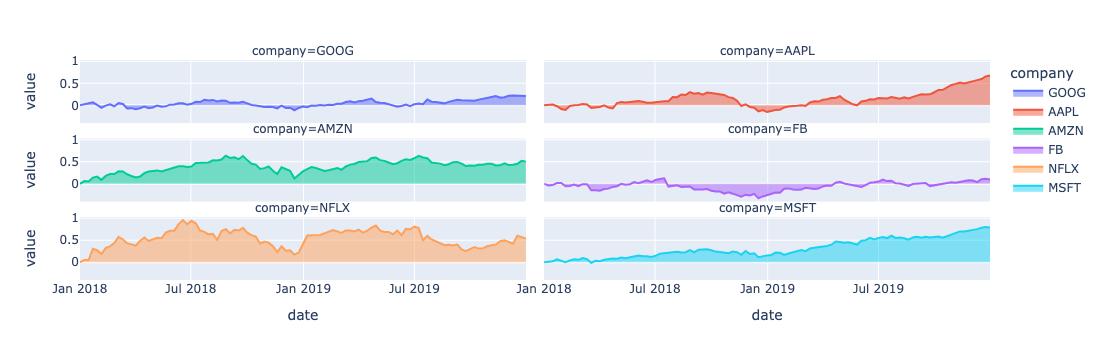

In [97]:
import plotly.express as px

df = px.data.stocks(indexed=True)-1
fig = px.area(df, facet_col="company", facet_col_wrap=2)
fig.show()

In [100]:
import pandas as pd

def createDF(timestamps, name):
    """Create a dataframe from the timestamps.
    """ 
    triplets = [(timestamps[i], 1, name) for i in range(len(timestamps))]
    df = pd.DataFrame(triplets, 
                      columns=['Timestamp', 'Count', 'Chunk'])
    df.set_index('Timestamp', inplace=True)
    dfCounts = df.groupby('Chunk').resample('h')['Count'].sum().reset_index()
    return dfCounts

In [101]:
dataframes = []
for artist in timeSeriesDct:
    dataframes.append(createDF(timeSeriesDct[artist], artist))

for df in dataframes:
    print(df.head())
    print()

     Chunk           Timestamp  Count
0  chunk_1 2024-01-30 18:00:00      7
1  chunk_1 2024-01-30 19:00:00      1
2  chunk_1 2024-01-30 20:00:00      0
3  chunk_1 2024-01-30 21:00:00      0
4  chunk_1 2024-01-30 22:00:00      0

     Chunk           Timestamp  Count
0  chunk_2 2024-02-04 19:00:00     88
1  chunk_2 2024-02-04 20:00:00     10
2  chunk_2 2024-02-04 21:00:00      0
3  chunk_2 2024-02-04 22:00:00      0
4  chunk_2 2024-02-04 23:00:00     29

     Chunk           Timestamp  Count
0  chunk_3 2024-01-20 01:00:00     10
1  chunk_3 2024-01-20 02:00:00    157
2  chunk_3 2024-01-20 03:00:00    155
3  chunk_3 2024-01-20 04:00:00      0
4  chunk_3 2024-01-20 05:00:00      0

     Chunk           Timestamp  Count
0  chunk_4 2024-01-09 20:00:00     28
1  chunk_4 2024-01-09 21:00:00      0
2  chunk_4 2024-01-09 22:00:00    125
3  chunk_4 2024-01-09 23:00:00     18
4  chunk_4 2024-01-10 00:00:00      2

     Chunk           Timestamp  Count
0  chunk_5 2024-01-03 00:00:00     68
1  chunk

In [102]:
dataframes.sort(key=lambda item: item['Timestamp'].min())

# Check that the dataframes were sorted
for df in dataframes:
    print(df.head())
    print()

     Chunk           Timestamp  Count
0  chunk_6 2023-12-23 00:00:00     12
1  chunk_6 2023-12-23 01:00:00     82
2  chunk_6 2023-12-23 02:00:00      0
3  chunk_6 2023-12-23 03:00:00      0
4  chunk_6 2023-12-23 04:00:00     45

     Chunk           Timestamp  Count
0  chunk_5 2024-01-03 00:00:00     68
1  chunk_5 2024-01-03 01:00:00    135
2  chunk_5 2024-01-03 02:00:00    116
3  chunk_5 2024-01-03 03:00:00    159
4  chunk_5 2024-01-03 04:00:00      0

     Chunk           Timestamp  Count
0  chunk_4 2024-01-09 20:00:00     28
1  chunk_4 2024-01-09 21:00:00      0
2  chunk_4 2024-01-09 22:00:00    125
3  chunk_4 2024-01-09 23:00:00     18
4  chunk_4 2024-01-10 00:00:00      2

     Chunk           Timestamp  Count
0  chunk_3 2024-01-20 01:00:00     10
1  chunk_3 2024-01-20 02:00:00    157
2  chunk_3 2024-01-20 03:00:00    155
3  chunk_3 2024-01-20 04:00:00      0
4  chunk_3 2024-01-20 05:00:00      0

     Chunk           Timestamp  Count
0  chunk_1 2024-01-30 18:00:00      7
1  chunk

In [103]:
dfMerged = pd.concat(dataframes)
dfMerged.shape

(2225, 3)

In [104]:
dfMerged

,Chunk,Timestamp,Count
0,chunk_6,2023-12-23 00:00:00,12
1,chunk_6,2023-12-23 01:00:00,82
2,chunk_6,2023-12-23 02:00:00,0
3,chunk_6,2023-12-23 03:00:00,0
4,chunk_6,2023-12-23 04:00:00,45
...,...,...,...
345,chunk_2,2024-02-19 04:00:00,3
346,chunk_2,2024-02-19 05:00:00,11
347,chunk_2,2024-02-19 06:00:00,0
348,chunk_2,2024-02-19 07:00:00,35


In [105]:
dfMerged.reset_index(drop=True, inplace=True)
dfMerged

,Chunk,Timestamp,Count
0,chunk_6,2023-12-23 00:00:00,12
1,chunk_6,2023-12-23 01:00:00,82
2,chunk_6,2023-12-23 02:00:00,0
3,chunk_6,2023-12-23 03:00:00,0
4,chunk_6,2023-12-23 04:00:00,45
...,...,...,...
2220,chunk_2,2024-02-19 04:00:00,3
2221,chunk_2,2024-02-19 05:00:00,11
2222,chunk_2,2024-02-19 06:00:00,0
2223,chunk_2,2024-02-19 07:00:00,35


In [112]:
finalDF = dfMerged.pivot(index='Timestamp', 
                         columns='Chunk', 
                         values='Count').fillna(0)
finalDF.head()

Chunk,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6
Timestamp,,,,,,
2023-12-23 00:00:00,0.0,0.0,0.0,0.0,0.0,12.0
2023-12-23 01:00:00,0.0,0.0,0.0,0.0,0.0,82.0
2023-12-23 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-23 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-23 04:00:00,0.0,0.0,0.0,0.0,0.0,45.0


In [113]:
dfMerged['Chunk'].unique()

array(['chunk_6', 'chunk_5', 'chunk_4', 'chunk_3', 'chunk_1', 'chunk_2'],
      dtype=object)

In [117]:
finalDF = finalDF.reindex(columns=list(dfMerged['Chunk'].unique()))
desired_order_descending = ['chunk_6', 'chunk_5', 'chunk_4', 'chunk_3', 'chunk_2', 'chunk_1']
finalDF = finalDF.reindex(columns=desired_order)
finalDF.tail()

Chunk,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6
Timestamp,,,,,,
2024-03-04 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-04 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-04 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-04 20:00:00,33.0,0.0,0.0,0.0,0.0,0.0
2024-03-04 21:00:00,275.0,0.0,0.0,0.0,0.0,0.0


In [118]:
import plotly.express as px

df = px.data.stocks(indexed=True)-1
df.head()

company,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.018172,0.011943,0.061881,-0.040032,0.053526,0.015988
2018-01-15,0.032008,0.019771,0.053240,-0.029757,0.049860,0.020524
2018-01-22,0.066783,-0.019943,0.140676,0.016858,0.307681,0.066561
2018-01-29,0.008773,-0.082857,0.163374,0.018357,0.273537,0.040708


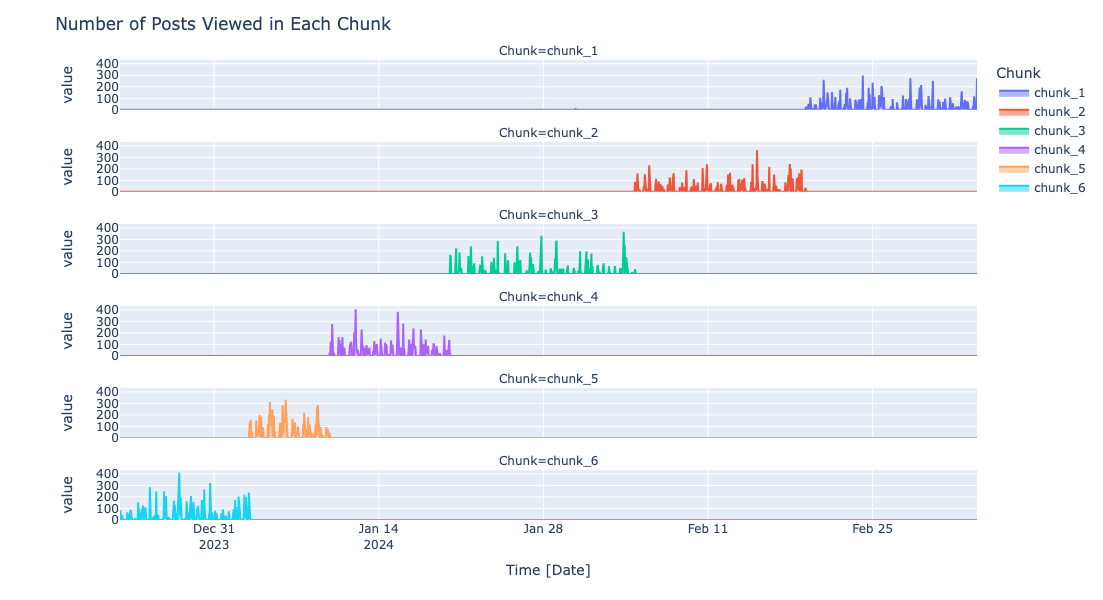

In [148]:
fig = px.area(finalDF, facet_col="Chunk", facet_col_wrap=1)

fig.update_layout(
    margin=dict(l=120),  # Adjust 'l' (left margin) as needed to create more space
    title={'text': "Number of Posts Viewed in Each Chunk"},
    height=600, width=800,
    xaxis_title="Time [Date]"
)
fig.show()

In [124]:
hourly_average_activity = finalDF.groupby(finalDF.index.hour).mean()

In [125]:
hourly_average_activity

Chunk,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6
Timestamp,,,,,,
0,10.315068,7.890411,5.465753,9.630137,8.767123,11.424658
1,3.424658,7.383562,6.753425,13.109589,7.054795,10.232877
2,9.684932,7.095890,14.301370,9.164384,11.082192,11.328767
3,11.369863,6.561644,16.945205,3.506849,9.027397,4.164384
4,11.369863,10.506849,1.561644,6.684932,5.410959,11.260274
5,4.958904,7.958904,0.493151,4.397260,2.424658,1.904110
6,2.397260,1.027397,0.000000,0.000000,0.000000,3.794521
7,0.410959,0.479452,0.000000,0.000000,0.616438,1.164384
8,0.369863,0.054795,0.000000,0.000000,0.000000,0.000000


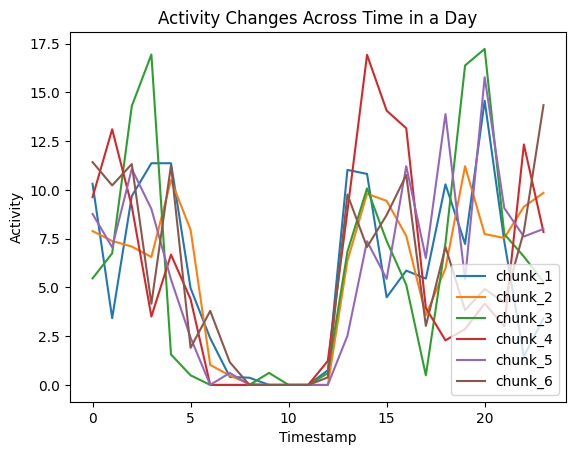

In [135]:
import matplotlib.pyplot as plt

for column in hourly_average_activity.columns:
    plt.plot(hourly_average_activity.index, hourly_average_activity[column], label=column)

plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.title('Activity Changes Across Time in a Day')
plt.legend(loc='lower right')
plt.show()

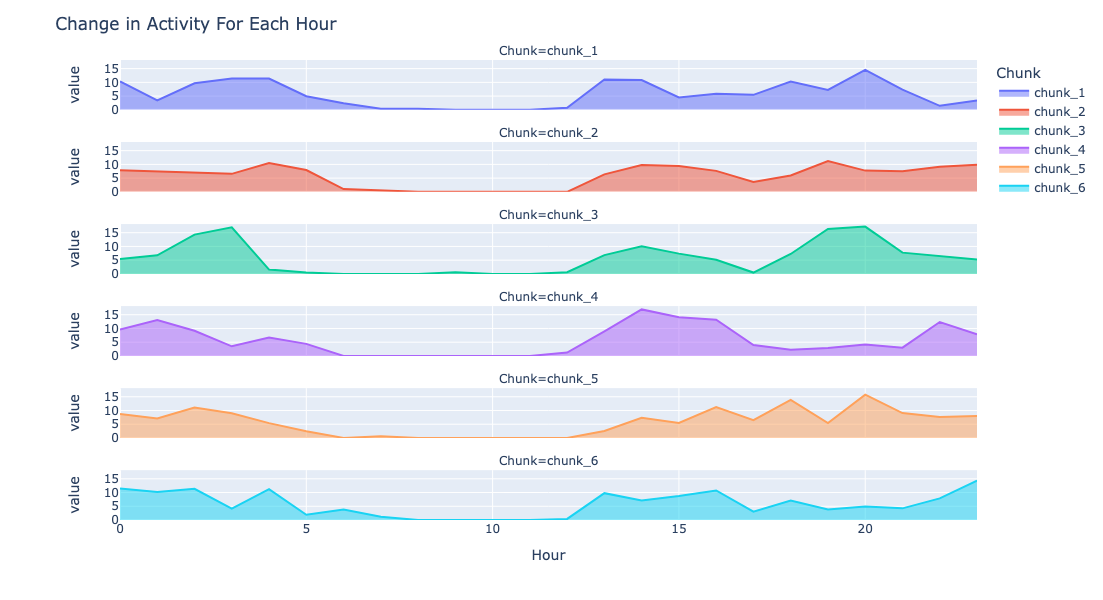

In [147]:
import plotly.express as px

# Assuming finalDF is your time series DataFrame with timestamps as index
fig = px.area(hourly_average_activity, facet_col="Chunk", facet_col_wrap=1)

# Update layout
fig.update_layout(
    margin=dict(l=120),  # Adjust 'l' (left margin) as needed to create more space
    title={'text': "Change in Activity For Each Hour"},
    height=600, width=800,
    xaxis_title="Hour"
)

fig.show()

In [130]:
hourly_average_all_chunks = finalDF.groupby(finalDF.index.hour).mean()

In [131]:
hourly_average_all_chunks

Chunk,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6
Timestamp,,,,,,
0,10.315068,7.890411,5.465753,9.630137,8.767123,11.424658
1,3.424658,7.383562,6.753425,13.109589,7.054795,10.232877
2,9.684932,7.095890,14.301370,9.164384,11.082192,11.328767
3,11.369863,6.561644,16.945205,3.506849,9.027397,4.164384
4,11.369863,10.506849,1.561644,6.684932,5.410959,11.260274
5,4.958904,7.958904,0.493151,4.397260,2.424658,1.904110
6,2.397260,1.027397,0.000000,0.000000,0.000000,3.794521
7,0.410959,0.479452,0.000000,0.000000,0.616438,1.164384
8,0.369863,0.054795,0.000000,0.000000,0.000000,0.000000


In [132]:
hourly_average_all_chunks['Average_Activity'] = hourly_average_all_chunks.mean(axis=1)

In [133]:
hourly_average_all_chunks

Chunk,chunk_1,chunk_2,chunk_3,chunk_4,chunk_5,chunk_6,Average_Activity
Timestamp,,,,,,,
0,10.315068,7.890411,5.465753,9.630137,8.767123,11.424658,8.915525
1,3.424658,7.383562,6.753425,13.109589,7.054795,10.232877,7.993151
2,9.684932,7.095890,14.301370,9.164384,11.082192,11.328767,10.442922
3,11.369863,6.561644,16.945205,3.506849,9.027397,4.164384,8.595890
4,11.369863,10.506849,1.561644,6.684932,5.410959,11.260274,7.799087
5,4.958904,7.958904,0.493151,4.397260,2.424658,1.904110,3.689498
6,2.397260,1.027397,0.000000,0.000000,0.000000,3.794521,1.203196
7,0.410959,0.479452,0.000000,0.000000,0.616438,1.164384,0.445205
8,0.369863,0.054795,0.000000,0.000000,0.000000,0.000000,0.070776


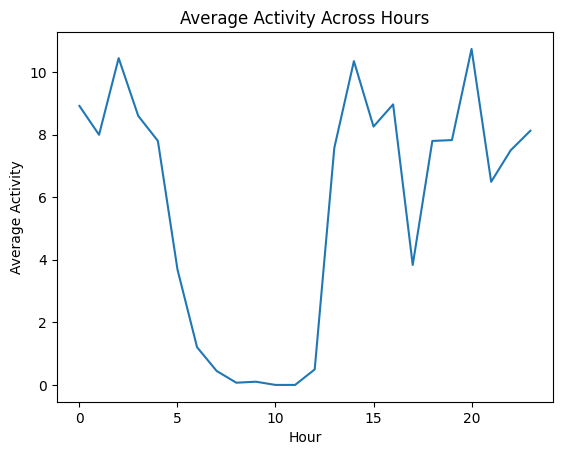

In [134]:
import matplotlib.pyplot as plt

hourly_average_all_chunks['Average_Activity'].plot()

plt.xlabel('Hour')
plt.ylabel('Average Activity')
plt.title('Average Activity Across Hours')

plt.show()